In [185]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
df = pd.merge(ride_data, city_data, on="city")

# Display the data table for preview
df.head(2)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban


In [186]:
types = df.iloc[:,5]
types.unique()
#Use iloc tofind out the names of the ride types.

array(['Urban', 'Suburban', 'Rural'], dtype=object)

## Bubble Plot of Ride Sharing Data

In [187]:
# Obtain the x and y coordinates for each of the three city types

# Total Number of Rides All Cities
num_rides_total = df.groupby('city').ride_id.count().tolist() #
total_number = sum(num_rides_city)
print(total_number)

2375


(15, 45)

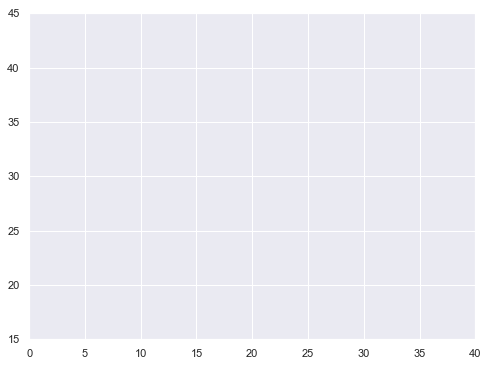

In [188]:
# Build the scatter plots for each city types
# creating variables for rural plotting
rural_rides_city = df.query('type == "Rural"')

num_rides_city_rural = rural_rides_city.groupby('city').ride_id.count().tolist()

ave_fare_rural = rural_rides_city.groupby('city').fare.mean().tolist()

size_rural = rural_rides_city.groupby('city').driver_count.mean().tolist()

# creating variables for suburban plotting
suburban_rides_city = df.query('type == "Suburban"')

num_rides_city_suburban = suburban_rides_city.groupby('city').ride_id.count().tolist()
 
ave_fare_suburban = suburban_rides_city.groupby('city').fare.mean().tolist()

size_suburban = suburban_rides_city.groupby('city').driver_count.mean().tolist()

# creating variables for urban plotting
urban_rides_city = df.query('type == "Urban"')
num_rides_city_urban = urban_rides_city.groupby('city').ride_id.count().tolist()
ave_fare_urban = urban_rides_city.groupby('city').fare.mean().tolist()
size_urban = urban_rides_city.groupby('city').driver_count.mean().tolist()

# Incorporate the other graph properties
sns.set()
plt.figure(figsize=(8,6))
plt.xlim(0,40)
plt.ylim(15,45)

(15, 45)

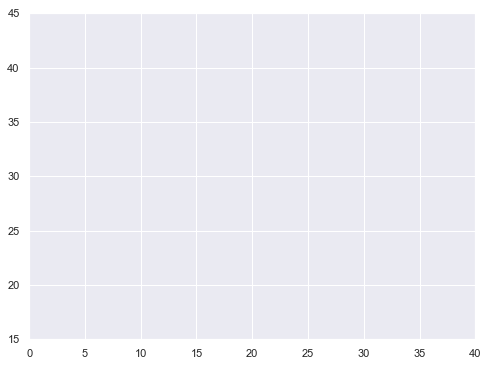

In [189]:
# Incorporate the other graph properties
sns.set()
plt.figure(figsize=(8,6))
plt.xlim(0,40)
plt.ylim(15,45)

In [190]:
rural_rides_city = df.query('type == "Rural"')

num_rides_city_rural = rural_rides_city.groupby('city').ride_id.count().tolist()

ave_fare_rural = rural_rides_city.groupby('city').fare.mean().tolist()

size_rural = rural_rides_city.groupby('city').driver_count.mean().tolist()
print(num_rides_city_rural, ave_fare_rural, size_rural) #I just print things sometimes to make sure that they're working. 

[10, 3, 6, 6, 6, 11, 12, 6, 4, 9, 8, 5, 5, 7, 8, 4, 6, 9] [40.064, 24.123333333333335, 33.47, 36.01333333333333, 34.358333333333334, 26.061818181818182, 34.99750000000001, 43.278333333333336, 36.745000000000005, 29.130000000000003, 30.802500000000002, 35.246, 29.741999999999997, 35.26428571428572, 41.870000000000005, 36.16, 42.26333333333333, 33.89] [7, 7, 4, 1, 4, 2, 6, 2, 1, 8, 1, 6, 9, 7, 1, 7, 1, 4]


In [191]:
# Ride type = Surburban data
suburban_rides_city = df.query('type == "Suburban"')

num_rides_city_suburban = suburban_rides_city.groupby('city').ride_id.count().tolist()

ave_fare_suburban = suburban_rides_city.groupby('city').fare.mean().tolist()

size_suburban = suburban_rides_city.groupby('city').driver_count.mean().tolist()

In [192]:
# Ride type = Urban data
urban_rides_city = df.query('type == "Urban"')

num_rides_city_urban = urban_rides_city.groupby('city').ride_id.count().tolist()

ave_fare_urban = urban_rides_city.groupby('city').fare.mean().tolist()
 
size_urban = urban_rides_city.groupby('city').driver_count.mean().tolist()

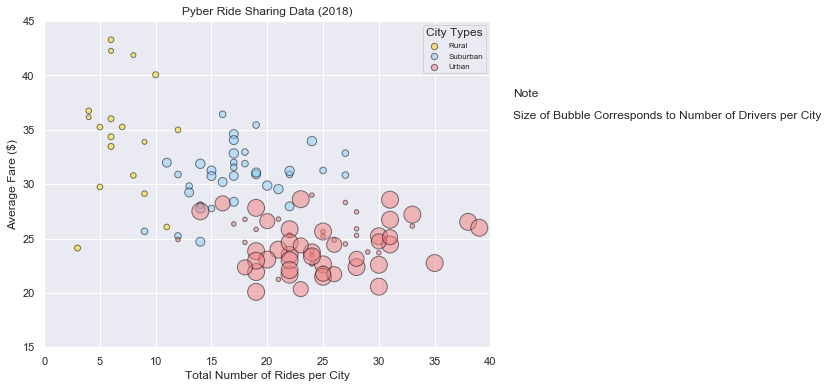

In [193]:
#Prepare for Bubble Chart
sns.set()

plt.figure(figsize=(8,6))
plt.xlim(0,40)
plt.ylim(15,45)

plt.scatter(num_rides_city_rural, ave_fare_rural, s=rural_rides_city['driver_count']*4, c="gold", \
            edgecolors="black", alpha=.5, linewidth=1, label="Rural")
plt.scatter(num_rides_city_suburban,ave_fare_suburban, s=suburban_rides_city['driver_count']*4, \
            c="lightskyblue", edgecolors="black",alpha=.5, linewidth=1, label="Suburban")
plt.scatter(num_rides_city_urban,ave_fare_urban, s=urban_rides_city['driver_count']*4, c="lightcoral", \
            edgecolors="black",alpha=.5, linewidth=1, label="Urban")

plt.text(42, 38, "Note")
plt.text(42 ,36, "Size of Bubble Corresponds to Number of Drivers per City")
plt.title('Pyber Ride Sharing Data (2018)')
plt.xlabel('Total Number of Rides per City')
plt.ylabel('Average Fare ($)')

legend = plt.legend(title="City Types", fontsize=8, loc='upper right')
legend.legendHandles[0]._sizes = [40]
legend.legendHandles[1]._sizes = [40] 
legend.legendHandles[2]._sizes = [40]

plt.show()

## Total Fares by City Type

In [194]:
# Calculate Type Percents
arrange_by_area_type = df.groupby(['type']).sum()["fare"].tolist()

In [195]:
# Build Pie Chart
values = arrange_by_area_type
title = "Total Receipts per Area Type"
labels = ['Rural', 'Urban','Suburban']
colors = ['gold', 'skyblue', 'coral']
explodes = (0,0,.14)
autopct = "%1.1f%%"

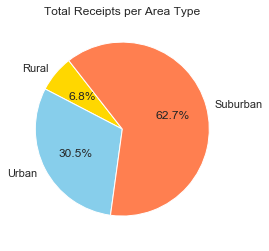

In [196]:
# Show and save
plt.title(title)
plt.pie(values, startangle=startangle, autopct=autopct, labels=labels,colors=colors)
plt.savefig('percent_by_ride_type.png')
plt.show()

## Total Rides by City Type

In [197]:
# Calculate Ride Percents
arrange_by_ride_type = df.groupby(['type']).count()["ride_id"].tolist()

In [198]:
# Pie Chart Figure varables
values = arrange_by_ride_type
title = "Percentage of Receipts by Ride Type"
labels = ['Rural', 'Urban','Suburban']
colors = ['gold', 'skyblue', 'coral']
explodes = (0,0,.14)
autopct = "%1.1f%%"
startangle = 128

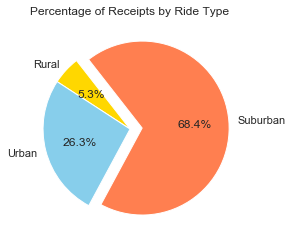

<Figure size 432x288 with 0 Axes>

In [199]:
# Show Figure and Save To Disk
plt.title(title)
plt.pie(values, explode=explodes,startangle=startangle, autopct=autopct, labels=labels,colors=colors)
plt.show()
plt.savefig('receipts_by_Ride_type.png')

## Total Drivers by City Type

In [200]:
# Calculate Driver Percents
arrange_by_driver = df.groupby(['type']).count()["driver_count"].tolist()

In [201]:
# Pie Chart Figure varables
values = arrange_by_driver
title = "Total Receipts by Driver Type"
labels = ['Rural', 'Urban','Suburban']
colors = ['gold', 'skyblue', 'coral']
explodes = (0,0,.14) 
autopct = "%1.1f%%"
startangle = 123
shadow = "True"

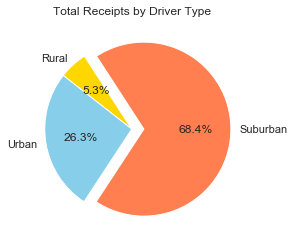

<Figure size 432x288 with 0 Axes>

In [202]:
# Show Figure and Save to Disk
plt.title(title)
plt.pie(values, explode=explodes,startangle=startangle, autopct=autopct, labels=labels,colors=colors)
plt.show()
plt.savefig('rides_by_Ride_type.png')

In [203]:
print("My best technical analysis is, contrary to the way drivers strategize in the US, it seems that drivers in the UK travel from urban to suburban areas in order to pick up more fares, as well as fares that generally pay more.")

My best technical analysis is, contrary to the way drivers strategize in the US, it seems that drivers in the UK travel from urban to suburban areas in order to pick up more fares, as well as fares that generally pay more.
